In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
ae=pd.read_csv(r"alcohol  effect.csv")
ae

,sex,age,address,Pstatus,Fjob,studytime,activities,internet,romantic,famrel,freetime,Walc,health,absences,G3
0,F,18.0,U,A,NaN,2.0,no,no,NaN,4.0,3.0,1.0,3.0,3.72,11.0
1,F,17.0,U,T,other,NaN,no,yes,no,5.0,3.0,1.0,3.0,1.86,11.0
2,F,15.0,R,T,other,2.0,no,yes,no,4.0,3.0,3.0,3.0,5.58,12.0
3,F,15.0,U,T,services,3.0,yes,yes,yes,NaN,2.0,1.0,5.0,0,14.0
4,F,16.0,U,T,other,2.0,no,no,no,4.0,3.0,2.0,5.0,0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,M,NaN,R,T,other,1.0,yes,no,yes,NaN,1.0,3.0,5.0,1.86,12.0
545,M,17.0,U,T,other,2.0,yes,yes,yes,5.0,4.0,4.0,5.0,7.44,8.0
546,NaN,17.0,U,T,health,2.0,no,yes,no,5.0,2.0,1.0,5.0,0,NaN
547,F,16.0,R,T,at_home,NaN,no,yes,no,4.0,1.0,1.0,2.0,0,11.0


In [3]:
ae.head()

,sex,age,address,Pstatus,Fjob,studytime,activities,internet,romantic,famrel,freetime,Walc,health,absences,G3
0,F,18.0,U,A,NaN,2.0,no,no,NaN,4.0,3.0,1.0,3.0,3.72,11.0
1,F,17.0,U,T,other,NaN,no,yes,no,5.0,3.0,1.0,3.0,1.86,11.0
2,F,15.0,R,T,other,2.0,no,yes,no,4.0,3.0,3.0,3.0,5.58,12.0
3,F,15.0,U,T,services,3.0,yes,yes,yes,NaN,2.0,1.0,5.0,0,14.0
4,F,16.0,U,T,other,2.0,no,no,no,4.0,3.0,2.0,5.0,0,13.0


In [4]:
ae.shape

(549, 15)

In [5]:
ae.duplicated().sum()

0

In [6]:
df = ae.copy()

In [7]:
df['absences'] = pd.to_numeric(df['absences'], errors='coerce')

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [9]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
df.isna().sum()

sex           0
age           0
address       0
Pstatus       0
Fjob          0
studytime     0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [11]:
df['G3_class'] = (df['G3'] >= 10).astype(int)

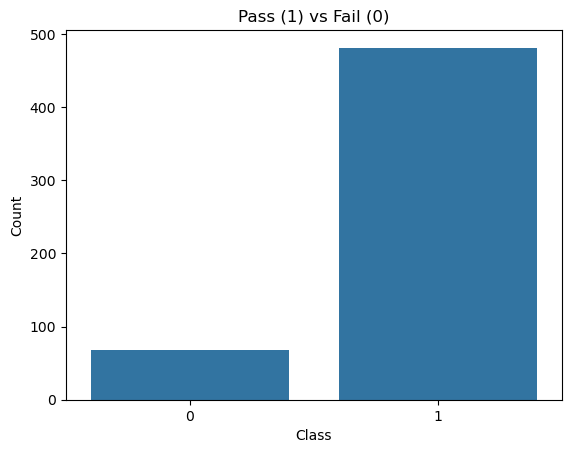

In [12]:
sns.countplot(x=df['G3_class'])
plt.title("Pass (1) vs Fail (0)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


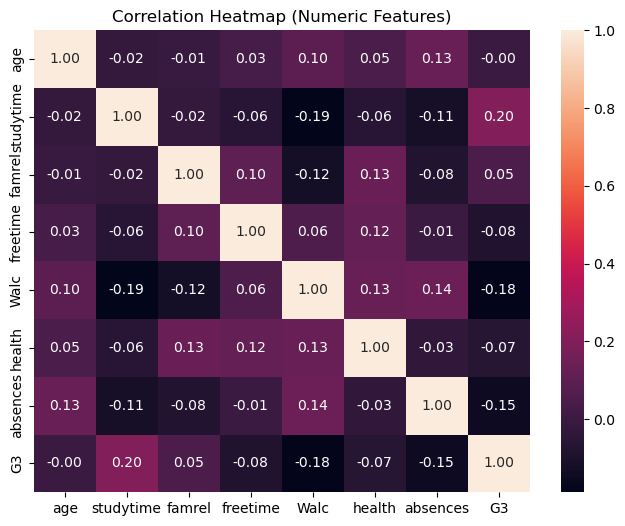

In [13]:
numeric = df[['age', 'studytime', 'famrel', 'freetime', 'Walc', 'health', 'absences', 'G3']]
plt.figure(figsize=(8,6))
sns.heatmap(numeric.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [14]:
y = df['G3_class']
X = df.drop(['G3', 'G3_class'], axis=1)

In [15]:
X = pd.get_dummies(X, drop_first=True)

In [16]:
X.shape

(549, 17)

In [17]:
X.head()

,age,studytime,famrel,freetime,Walc,health,absences,sex_M,address_U,Pstatus_T,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,activities_yes,internet_yes,romantic_yes
0,18.0,2.0,4.0,3.0,1.0,3.0,3.72,False,True,False,False,True,False,False,False,False,False
1,17.0,2.0,5.0,3.0,1.0,3.0,1.86,False,True,True,False,True,False,False,False,True,False
2,15.0,2.0,4.0,3.0,3.0,3.0,5.58,False,False,True,False,True,False,False,False,True,False
3,15.0,3.0,4.0,2.0,1.0,5.0,0.00,False,True,True,False,False,True,False,True,True,True
4,16.0,2.0,4.0,3.0,2.0,5.0,0.00,False,True,True,False,True,False,False,False,False,False


In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, y,
    test_size=0.2,       
    random_state=6,     
    stratify=y          
)

print(xtrain.shape, xtest.shape)


(439, 17) (110, 17)


In [19]:
model = RandomForestClassifier(
    n_estimators=100,   
    random_state=6
)

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)

acc = accuracy_score(ytest, ypred)
print("Accuracy:", acc)


Accuracy: 0.8909090909090909


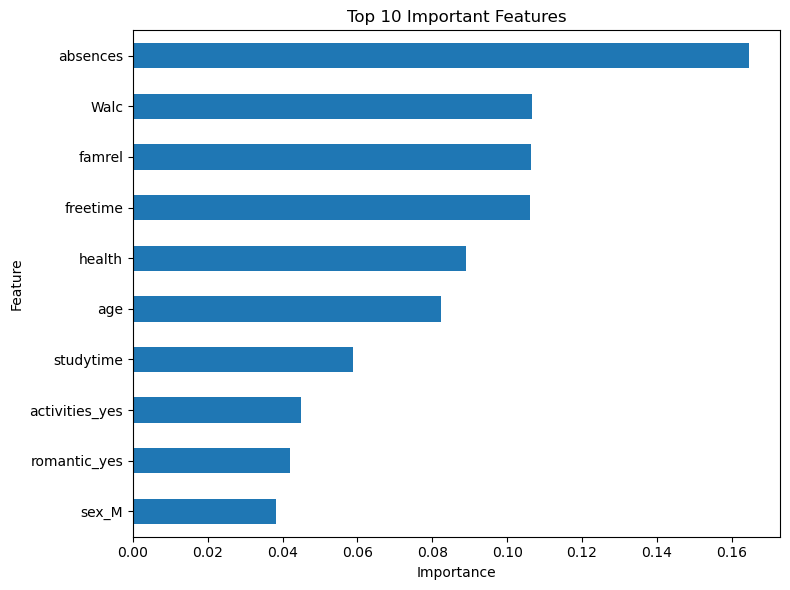

In [20]:
feat_imp = pd.Series(model.feature_importances_, index=xtrain.columns)
top10 = feat_imp.sort_values(ascending=True).tail(10)

plt.figure(figsize=(8,6))
top10.plot(kind='barh')   
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()